# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [2]:
# import package
import requests as rq
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re 

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [3]:
# setting each station name and their url
station_dict={}#dict with station names as key and link as values
url='https://www.thsrc.com.tw'
response=rq.get(url)
response.encoding='big-5' #soup will contain garbled text without this line
soup=bs(response.text,'html.parser')
station=soup.find_all('a', {'title' : re.compile(r'\w\w站'), 'target' : '_self'})#title='XX站'
for s in station:
    station_dict[s.get('title')]=url+s.get('href')#get the value of some paratmeter in a tag
station_dict

{'南港站': 'https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68',
 '台北站': 'https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490',
 '板橋站': 'https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f',
 '桃園站': 'https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
 '新竹站': 'https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4',
 '苗栗站': 'https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3',
 '台中站': 'https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779',
 '彰化站': 'https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e',
 '雲林站': 'https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f',
 '嘉義站': 'https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7',
 '台南站': 'https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814',
 '左營站': 'https://www.thsrc.com.t

In [4]:
# crawler the address of each station
# crawler the operation hours and ticketing hours of each station
address=[]
operation=[]
ticketing=[]
station_name=station_dict.keys()
for name,link in station_dict.items():
    response=rq.get(link)
    response.encoding='big-5'
    soup=bs(response.text,'html.parser')
    temp=soup.find('a',{'title':name+' 地址[另開新視窗]'}).text #use find since there is only one address
    address.append(temp)
    temp2=soup.find_all('td',{'class':'gray'}) #use find_all since class 'gray' has two instances
    operation.append(temp2[0].text[5:])
    ticketing.append(temp2[1].text[5:])    

In [5]:
# create a DataFrame
data=pd.DataFrame({'station':station_name,'address':address,'operation_hours':operation,'ticketing_hours':ticketing})
data

,station,address,operation_hours,ticketing_hours
0,南港站,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北站,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋站,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園站,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹站,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗站,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中站,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化站,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林站,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義站,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [11]:
# crawler GDP
# create GDP DataFrame
names=['Country','Region','IMF_Estimate','IMF_Year','United_Nations_Estimate','United_Nations_Year','World_Bank_Estimate','World_Bank_Year']
data=pd.DataFrame(columns=names)#need to set columns at first if empty
url='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
response=rq.get(url)
soup=bs(response.text,'html.parser')
gdp=soup.find('table',{'class':'wikitable'})#find gdp table
gdp=gdp.find_all('tr')#find all the tr in the table
count=0;
for i in gdp[2:]:  
    temp=i.text.strip()#delete the nbsp
    result=re.sub(r'\[\w\s*\w\]','',temp) #replace [...] with ''
    result=result.replace(',','').split('\n')#replace , with '' and split
    data.loc[len(data)]=result #add the result into the latest row of dataframe
    count+=1
    if count==50: #take top50
        break
data      

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020
1,China,Asia,16642318,2021,14342933,2019,14722731,2020
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020
5,India,Asia,3049704,2021,2891582,2019,2622984,2020
6,France,Europe,2938271,2021,2715518,2019,2603004,2020
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020


In [12]:
# crawler CPI
countries=[]
cpi20=[]
url='https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
response=rq.get(url)
soup=bs(response.text,'html.parser')
cpi=soup.find('table',{'class':'wikitable sortable'})
country=cpi.find_all('span',{'class':'flagicon'})
count=0
for i in country:
    country=i.find_next('a') #find the next 'a' of element in country
    countries.append(country.text)
    cpi20.append(country.find_next('td').text)
    count+=1
    if(count==100): #top100
        break

In [13]:
# CPI DataFrame
data2=pd.DataFrame({'Country':countries,'CPI_2020':cpi20})
data2

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [14]:
# merge GDP and CPI DataFrame
result=pd.merge(data,data2)#merge two data on column 'Country'
result

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020,67
1,China,Asia,16642318,2021,14342933,2019,14722731,2020,42
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020,74
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020,77
5,India,Asia,3049704,2021,2891582,2019,2622984,2020,40
6,France,Europe,2938271,2021,2715518,2019,2603004,2020,69
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020,53
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020,61


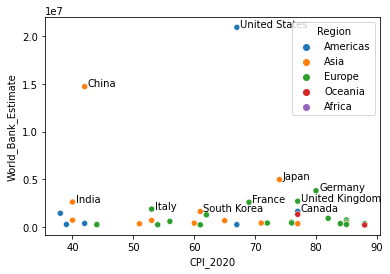

In [15]:
# plot
result['CPI_2020']=result['CPI_2020'].astype('int64')#need to transfer string into int for plotting
result['World_Bank_Estimate']=result['World_Bank_Estimate'].astype('int64')
myplot=sns.scatterplot(x='CPI_2020',y='World_Bank_Estimate',data=result,hue=result['Region'])#use Region for grouping
for i in range(10):
    myplot.text(result['CPI_2020'][i]+0.5,result['World_Bank_Estimate'][i],result['Country'][i])#for writing label beside top10 dots